# 1.1 Exercice théorique

$<w,b> + b = 0$

$w = \begin{pmatrix}1 & 2 & 3\end{pmatrix}^\intercal$ et $b = 4$

## 1.1.1 Lesquels des points suivants sont incorrectement classifiés ?

$x_1 = \begin{pmatrix}0 & 0 & 0\end{pmatrix}^\intercal$ et $y_1 = -1$. 

On a $<\begin{pmatrix}1 & 2 & 3\end{pmatrix}^\intercal, \begin{pmatrix}0 & 0 & 0\end{pmatrix}^\intercal> + 4 = 0\cdot 1 + 0\cdot 2+0\cdot 3 + 4= 4$ 

Pas correctement classifié car on veut $4\cdot-1>0$

----

$x_2 = \begin{pmatrix}-1 & -1 & -1\end{pmatrix}^\intercal$ et $y_2 = 1$.  => $-6 + 4 = -2$ 

Pas correctement classifié car on veut $-2\cdot 1>0$

----

$x_3 = \begin{pmatrix}-3.99 & -3 & 2\end{pmatrix}^\intercal$ et $y_2 = 1$.  => $-3.99 - 6 + 6 + 4 = 0.01$ 

Correctement classifié car $0.01\cdot 1>0$

## 1.1.2 Variables d'ajustements $\xi_i$

$\xi_1 = -4$

$\xi_2 = +2$

# 1.2 Données séparables linéairement

In [108]:
from sklearn.datasets import make_blobs
import numpy as np
import sklearn.svm
from matplotlib import pyplot as plt
from mglearn.plot_interactive_tree import plot_tree_partition
from mglearn.plot_2d_separator import plot_2d_separator
from mglearn.tools import discrete_scatter
from sklearn.metrics import classification_report

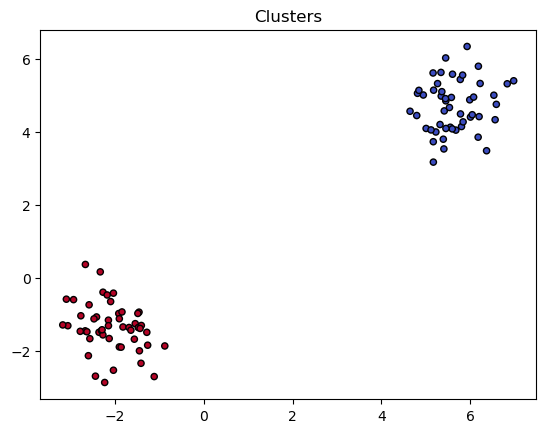

In [109]:
X, y = make_blobs(n_samples=100, centers=2, cluster_std=0.6, random_state=30032)
#plt.scatter(*Ax, marker='+')
#plt.scatter(*Bx, c= 'green', marker='o')

plt.scatter(X[:, 0], X[:, 1], c=y,cmap=plt.cm.coolwarm, s=20, edgecolors='k')
plt.title("Clusters")
plt.show()

Vecteurs de supports:
[[ 5.17214253  3.18029523]
 [-1.45777842 -0.93167404]
 [-0.87709567 -1.85862741]]


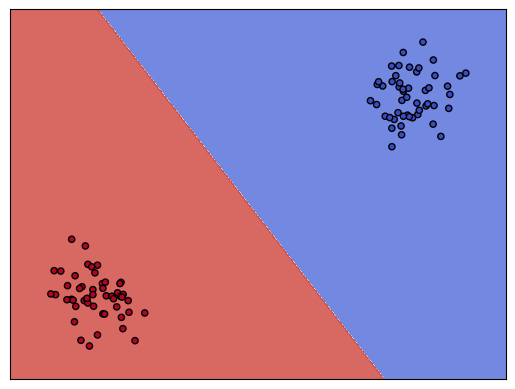

In [110]:
clf = sklearn.svm.SVC(kernel="linear")

clf.fit(X,y)

print("Vecteurs de supports:")
print(clf.support_vectors_)

# https://stackoverflow.com/a/51301399
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out
fig, ax = plt.subplots()
# title for the plots
# Set-up grid for plotting.
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
#ax.set_ylabel('y label here')
#ax.set_xlabel('x label here')
ax.set_xticks(())
ax.set_yticks(())
plt.show()

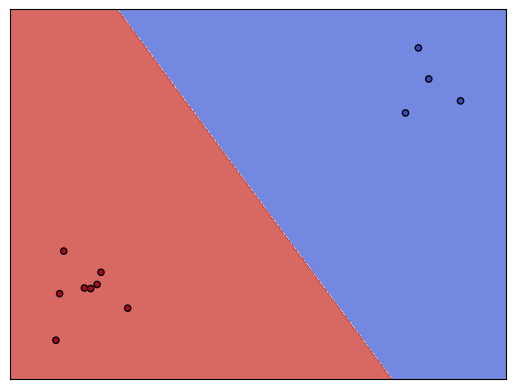

In [111]:
X2 = []
y2 = []
for i in range(len(X)):
    if X[i] in clf.support_vectors_:
        X2.append(X[i])
        y2.append(y[i])
    elif len(X2)<10:
        X2.append(X[i])
        y2.append(y[i])

X2=np.array(X2)
y2=np.array(y2)

clf2 = sklearn.svm.SVC(kernel="linear")
clf2.fit(X2, y2)

def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out
fig, ax = plt.subplots()
# title for the plots
# Set-up grid for plotting.
X0, X1 = X2[:, 0], X2[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, clf2, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y2, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
#ax.set_ylabel('y label here')
#ax.set_xlabel('x label here')
ax.set_xticks(())
ax.set_yticks(())
plt.show()

# 1.3 Données presque séparables linéairement

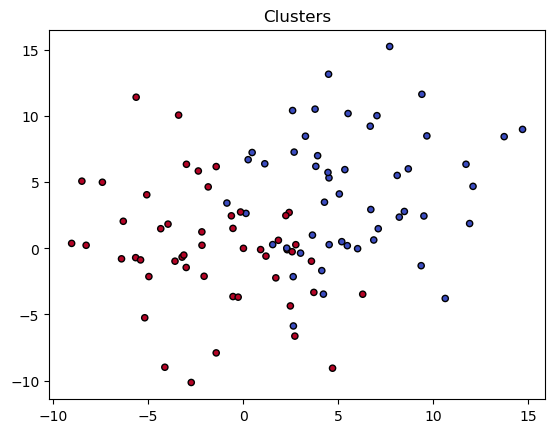

In [112]:
X, y = make_blobs(n_samples=100, centers=2, cluster_std=4, random_state=30032)


plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
plt.title("Clusters")
plt.show()

C=0.1
              precision    recall  f1-score   support

           0       0.91      0.82      0.86        50
           1       0.84      0.92      0.88        50

    accuracy                           0.87       100
   macro avg       0.87      0.87      0.87       100
weighted avg       0.87      0.87      0.87       100

C=0.01
              precision    recall  f1-score   support

           0       0.95      0.82      0.88        50
           1       0.84      0.96      0.90        50

    accuracy                           0.89       100
   macro avg       0.90      0.89      0.89       100
weighted avg       0.90      0.89      0.89       100

C=0.001
              precision    recall  f1-score   support

           0       0.91      0.84      0.88        50
           1       0.85      0.92      0.88        50

    accuracy                           0.88       100
   macro avg       0.88      0.88      0.88       100
weighted avg       0.88      0.88      0.88       100

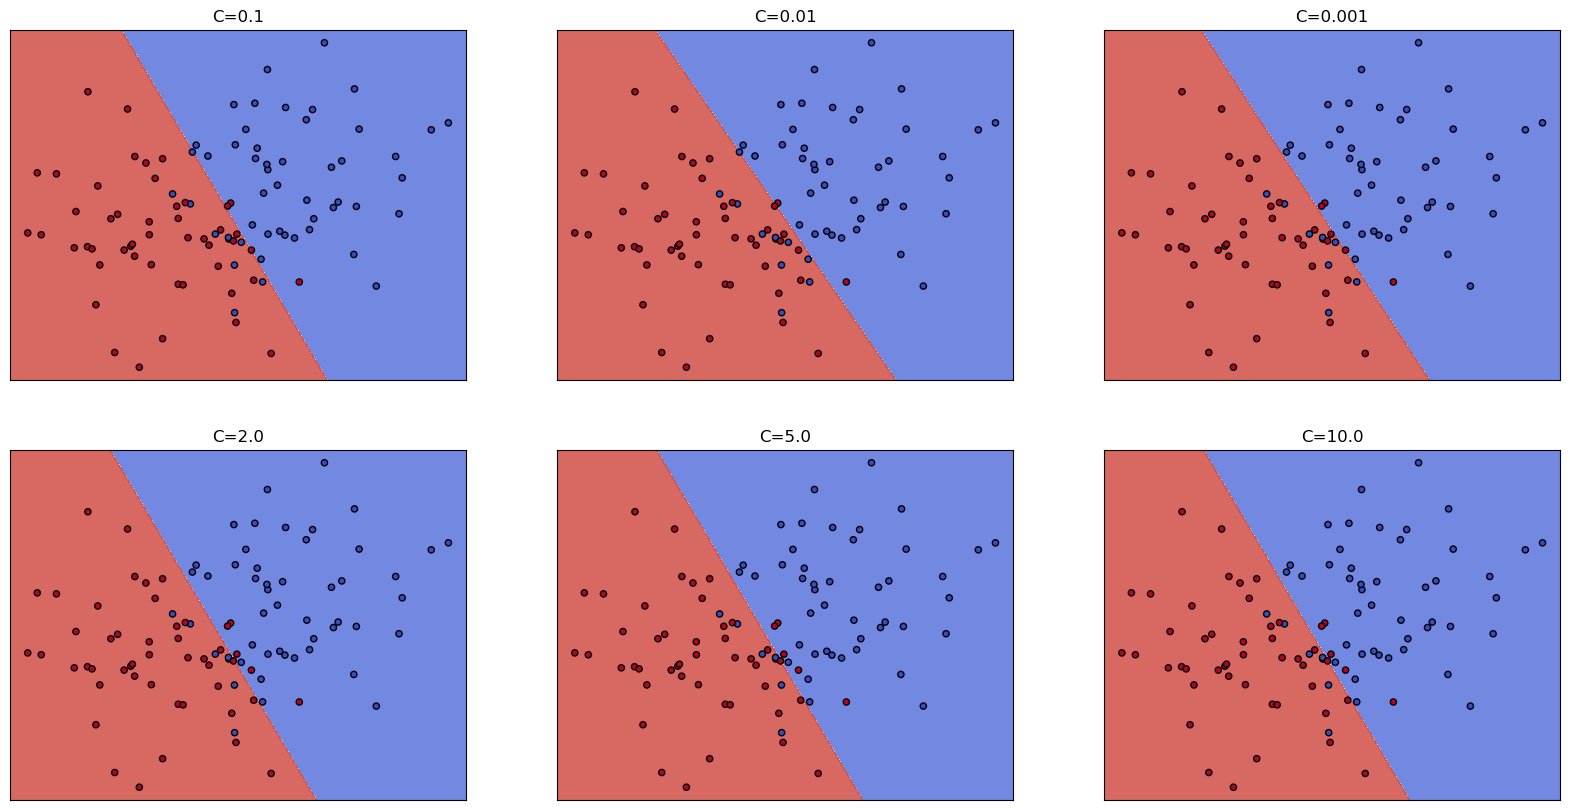

In [114]:
def plotC(C, ax):
    clf = sklearn.svm.SVC(kernel="linear", C=C)
    clf.fit(X,y)

    # https://stackoverflow.com/a/51301399
    def make_meshgrid(x, y, h=.02):
        x_min, x_max = x.min() - 1, x.max() + 1
        y_min, y_max = y.min() - 1, y.max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
        return xx, yy

    def plot_contours(ax, clf, xx, yy, **params):
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        out = ax.contourf(xx, yy, Z, **params)
        return out
    # title for the plots
    # Set-up grid for plotting.
    X0, X1 = X[:, 0], X[:, 1]
    xx, yy = make_meshgrid(X0, X1)
    ax.set_title(f"C={C}")
    plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    #ax.set_ylabel('y label here')
    #ax.set_xlabel('x label here')
    ax.set_xticks(())
    ax.set_yticks(())

    report = classification_report(y_true=y, y_pred=clf.predict(X))
    print(f"C={C}")
    print(report)


fig, axes = plt.subplots(2, 3, figsize=(20, 10))
axes=axes.ravel()
C=[0.1, 0.01, 0.001, 2.0, 5.0, 10.0]
for i in range(6):
    plotC(C=C[i], ax=axes[i])

plt.show()